## Install Libraries

In [1]:
!pip install opencv-python matplotlib

## Import Libraries

In [2]:
# Ensures that matplotlib plots appear inline in the Jupyter Notebook
%matplotlib inline

# Import OpenCV for image processing tasks
import cv2

# Import matplotlib for displaying images and plots
import matplotlib.pyplot as plt

# Import numpy for numerical operations and handling arrays
import numpy as np

### Loading the Image Using OpenCV (for create template)

In [3]:
colored_image_path = 'dataset/coloured/sahan 04.png'

# Load the image using OpenCV
img_colored = cv2.imread(colored_image_path)

# Verify if the image was loaded successfully
if img_colored is None:
    print("Error: Could not load colored spoon image.")
else:
    print("Colored spoon image loaded successfully.")


Colored spoon image loaded successfully.


### Displaying the loaded Image with Matplotlib

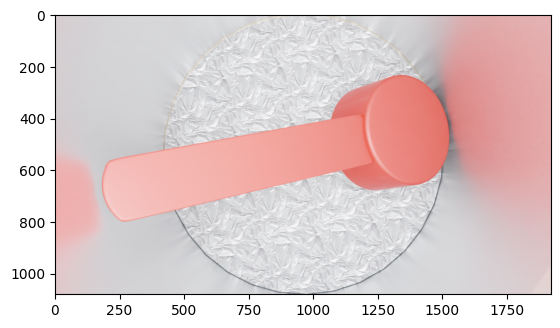

In [4]:
# Convert the image from BGR (OpenCV format) to RGB (matplotlib format) and display it
plt.imshow(cv2.cvtColor(img_colored, cv2.COLOR_BGR2RGB))
plt.show()

###  Cropping and Saving the Spoon Template from the Image

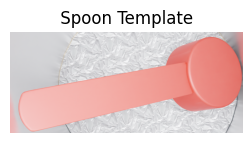

In [5]:
# Define the coordinates and size for cropping the template (x, y, width, height)
x, y, w, h = 130, 200, 1400, 610 

# Crop the region of interest (the spoon) from the colored image
template = img_colored[y:y+h, x:x+w]

# Save the cropped template to a file
cv2.imwrite('spoon_template.jpg', template)

# Display the template image
plt.figure(figsize=(3, 3))
plt.title(" Spoon Template ")
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Loading a Test Images

In [6]:
# Load a coloured image to test the spoon detection process
test_image_path = 'dataset/coloured/sahan 05.png'  
img_coloured = cv2.imread(test_image_path)
# Load a transparent image to test the spoon detection process
transparent_image_path = 'dataset/transperant/sahan 01.png'  
img_transparent = cv2.imread(transparent_image_path)

# Verify if the test images were successfully loaded
if img_coloured is None and img_transparent is None:
    print("Error: Could not load test image.")
else:
    print("Test image loaded for detection.")



Test image loaded for detection.


### Convert Images to Grayscale

In [7]:
# Convert both test image and template to grayscale
img_gray_coloured = cv2.cvtColor(img_coloured, cv2.COLOR_BGR2GRAY)
img_gray_trans = cv2.cvtColor(img_transparent, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

### ### Template Matching for coloured Spoon
##### (Using cv2.matchTemplate with normalized cross-correlation for better accuracy)

In [8]:
# Use TM_CCOEFF_NORMED for normalized cross-correlation (robust to lighting changes)
result = cv2.matchTemplate(img_gray_coloured, template_gray, cv2.TM_CCOEFF_NORMED)

# Get the best match location and confidence score
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


### Template Matching for Transparent Spoon

In [9]:
result_trans = cv2.matchTemplate(img_gray_trans, template_gray, cv2.TM_CCOEFF_NORMED)
min_val_trans, max_val_trans, _, max_loc_trans = cv2.minMaxLoc(result_trans)


### Detection Threshold & Visualization
##### (Set a threshold to filter weak matches and visualize results)

In [10]:
# Detection threshold 
threshold = 0.6  

if max_val >= threshold:
    print(f"Colored spoon detected! Confidence = {max_val:.2f}")  
    # Draw bounding box around the detected spoon
    h, w = template_gray.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img_result1 = img_coloured.copy()
    cv2.rectangle(img_result1, top_left, bottom_right, (0, 255, 0), 2)
else:
    print("No colored spoon detected (confidence too low).")
    img_result1 = img_coloured.copy()

threshold_trans = 0.6  
if max_val_trans >= threshold_trans:
    print(f"Transparent spoon detected! Confidence = {max_val_trans:.2f}")
    h, w = template_gray.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img_result2 = img_transparent.copy()
    cv2.rectangle(img_result2, top_left, bottom_right, (0, 255, 0), 2)
else:
    print("No transparent spoon detected.")
    img_result2 = img_transparent.copy()
    #print(f"Confidence value = {max_val_trans:.2f}")


Colored spoon detected! Confidence = 0.97
No transparent spoon detected.


### Display Results

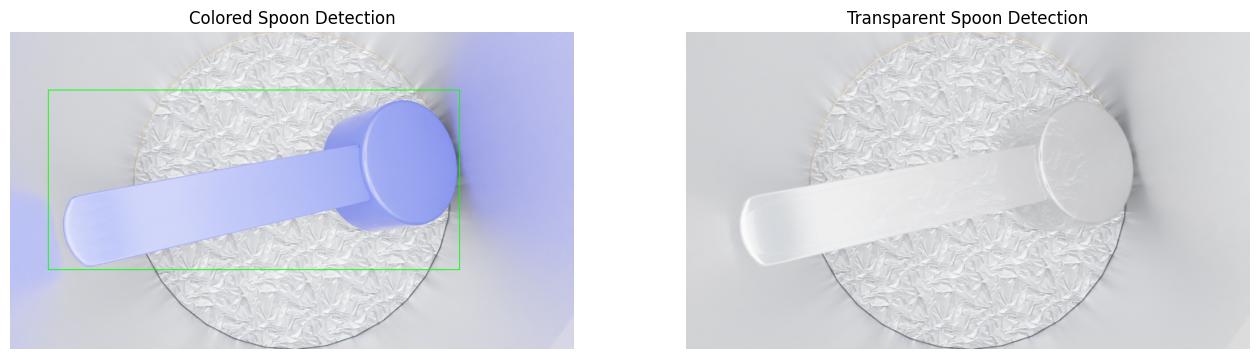

In [11]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Colored spoon result
ax1.set_title("Colored Spoon Detection")
ax1.imshow(cv2.cvtColor(img_result1, cv2.COLOR_BGR2RGB))
ax1.axis('off')

# Transparent spoon result
ax2.set_title("Transparent Spoon Detection")
ax2.imshow(cv2.cvtColor(img_result2, cv2.COLOR_BGR2RGB))
ax2.axis('off')

plt.show()

## Preprocess( Step by Step:  for  Debugging)

In [12]:
#### Function for visualize visualize
def visualize(image): 
    plt.figure(figsize=(8, 8))
    plt.title("Output")
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()


### Step 1 - Convert to Grayscale

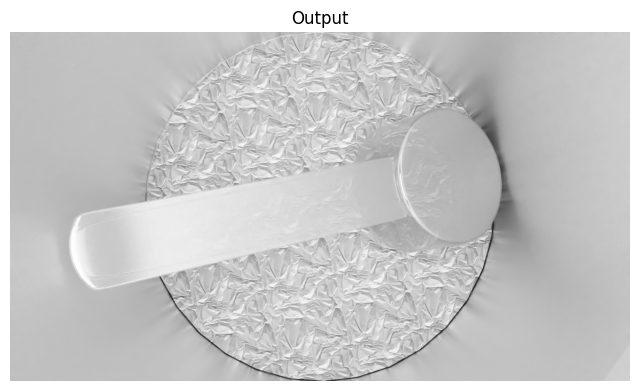

In [13]:
img_gray = cv2.cvtColor(img_transparent, cv2.COLOR_BGR2GRAY)
visualize(img_gray)

### Noise reduction

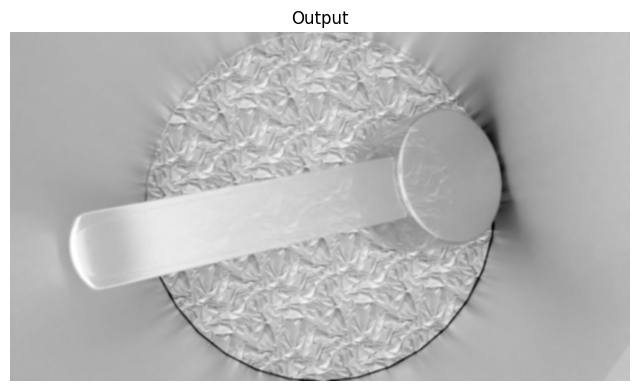

In [14]:
img_bilateral = cv2.bilateralFilter(img_gray, 9, 100, 100)
img_blur = cv2.GaussianBlur(img_bilateral, (5, 5), 10)
visualize(img_blur)

### Enhance Contrast with CLAHE

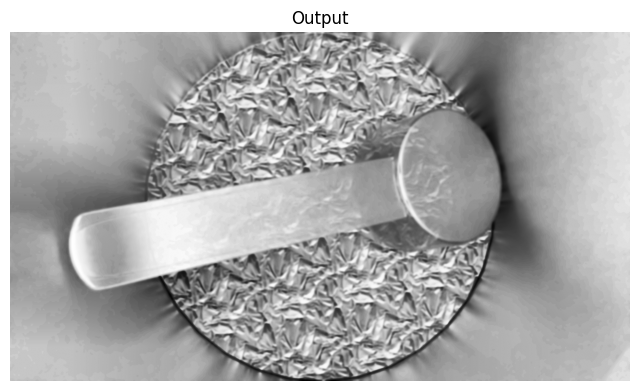

In [15]:
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5, 5))
img_contrast = clahe.apply(img_blur)
visualize(img_contrast)

 ### Canny Edge Detection

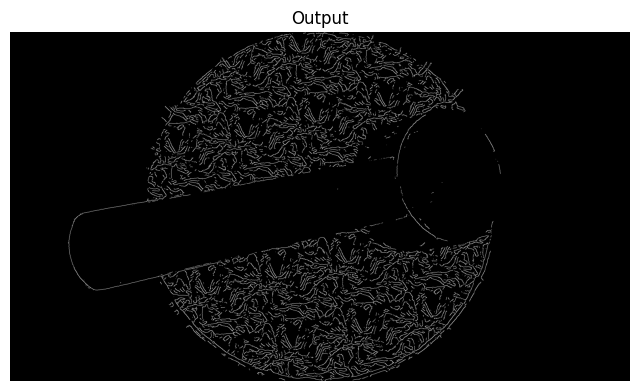

In [16]:
img_edges = cv2.Canny(img_contrast, 78, 80)
visualize(img_edges)

### Morphological Closing

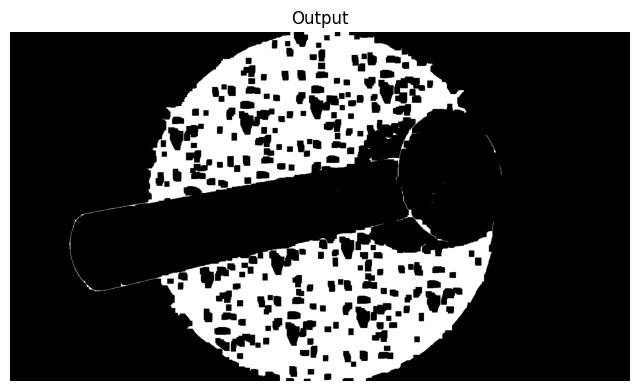

In [17]:
kernel = np.ones((6, 6), np.uint8)
img_closed = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel, iterations=3)
visualize(img_closed)

## Function for preprocess

In [18]:
def preprocess_image(image):
    # Step 1: Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Noise reduction (bilateral filter + Gaussian blur)
    img_bilateral = cv2.bilateralFilter(img_gray, 4, 100, 100)
    img_blur = cv2.GaussianBlur(img_bilateral, (5, 5), 10)
    
    # Step 3: Enhance contrast (stronger CLAHE)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5, 5))
    img_contrast = clahe.apply(img_blur)
    
    # Step 4: Edge detection (lower thresholds)
    img_edges = cv2.Canny(img_contrast, 78 , 80)  # Lowered for faint edges
    
    # Step 5: Morphological closing (stronger)
    kernel = np.ones((6, 6), np.uint8)  # Larger kernel
    img_closed = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel, iterations=3)
    
    return img_closed

### Preprocess Input and Template Images

In [19]:
# Preprocess transparent test image 
img_processed = preprocess_image(img_transparent)

# Preprocess the template image to match same preprocessing pipeline
template_processed = preprocess_image(template)  


### Perform Template Matching

In [20]:
# Perform template matching using the preprocessed images
result = cv2.matchTemplate(img_processed, template_processed, cv2.TM_CCOEFF_NORMED)

# Extract match results
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


### Evaluate Match and Draw Detection

Transparent spoon detected! Confidence-like score = 0.88


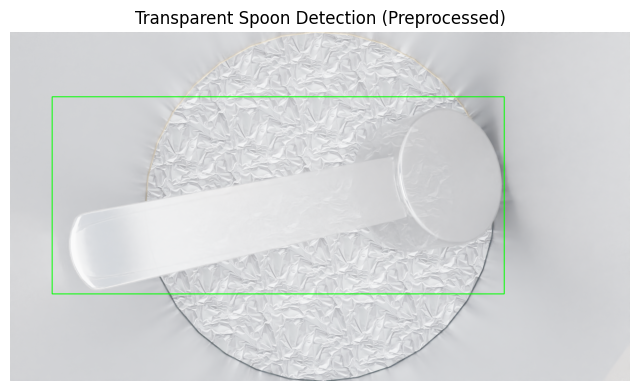

In [21]:
# Define threshold for positive detection
threshold = 0.6 

# Check if a match with sufficient confidence is found
if max_val >= threshold:
    print(f"Transparent spoon detected! Confidence-like score = {max_val:.2f}")
    
    # Get dimensions and coordinates for drawing bounding box
    h, w = template.shape[:2]
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Draw detection on the original image
    img_result = img_transparent.copy()
    cv2.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)
else:
    print(f"No transparent spoon detected. Confidence-like score = {max_val:.2f}")
    img_result = img_transparent.copy()
    
# Display the result of detection
plt.figure(figsize=(8, 8))
plt.title("Transparent Spoon Detection (Preprocessed)")
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## Create simple GUI

In [22]:
import tkinter as tk
from tkinter import filedialog, messagebox, Label, Button, Frame
from PIL import Image, ImageTk
from IPython.display import display


# GUI Class
class SpoonDetectionGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Transparent Spoon Detection")
        self.root.geometry("650x800")
        self.root.resizable(False, False)
        self.root.configure(bg="#e9eff1")  # Softer neutral background

        # Load template
        try:
            self.template = template
            if self.template is None:
                raise ValueError("Template image is None.")
        except NameError:
            messagebox.showerror("Error", "Template image not defined. Please load 'template' in your notebook.")
            self.root.destroy()
            return

        # --- Title ---
        self.title_label = Label(
            root,
            text="Transparent Spoon Detector",
            font=("Segoe UI", 22, "bold"),
            bg="#e9eff1",
            fg="#2c3e50"
        )
        self.title_label.pack(pady=(30, 10))

        # --- Button Frame ---
        self.button_frame = Frame(root, bg="#e9eff1")
        self.button_frame.pack(pady=10)

        self.upload_button = Button(
            self.button_frame,
            text="Upload Image",
            command=self.run_detection,
            font=("Segoe UI", 12),
            bg="#4a90e2",
            fg="white",
            activebackground="#357ABD",
            relief="flat",
            padx=20,
            pady=8
        )
        self.upload_button.pack(side=tk.LEFT, padx=10)

        self.reset_button = Button(
            self.button_frame,
            text="Reset",
            command=self.reset_display,
            font=("Segoe UI", 12),
            bg="#e74c3c",
            fg="white",
            activebackground="#c0392b",
            relief="flat",
            padx=20,
            pady=8
        )
        self.reset_button.pack(side=tk.LEFT, padx=10)

        # --- Result Label ---
        self.result_label = Label(
            root,
            text="No image processed yet.",
            font=("Segoe UI", 12),
            bg="#ffffff",
            fg="#2c3e50",
            padx=15,
            pady=10,
            relief="groove",
            borderwidth=1
        )
        self.result_label.pack(pady=20)

        # --- Image Display Frame ---
        self.image_frame = Frame(root, bg="#ffffff", relief="solid", borderwidth=2, width=420, height=420)
        self.image_frame.pack(pady=15)
        self.image_frame.pack_propagate(False)

        self.image_label = Label(self.image_frame, bg="#ffffff")
        self.image_label.pack(expand=True)

        # --- Loading Label (optional) ---
        self.loading_label = Label(
            root,
            text="Processing...",
            font=("Segoe UI", 11, "italic"),
            bg="#e9eff1",
            fg="#7f8c8d"
        )

    def run_detection(self):
        file_path = filedialog.askopenfilename(
            title="Select an Image for Detection",
            filetypes=[("Image files", "*.png *.jpg *.jpeg *.bmp")]
        )

        if not file_path:
            return

        self.loading_label.pack(pady=5)
        self.root.update()

        test_img = cv2.imread(file_path)
        if test_img is None:
            messagebox.showerror("Error", "Failed to load the selected image.")
            self.loading_label.pack_forget()
            return

        try:
            img_processed = preprocess_image(test_img)
            template_processed = preprocess_image(self.template)

            result = cv2.matchTemplate(img_processed, template_processed, cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

            threshold = 0.5
            if max_val >= threshold:
                h, w = self.template.shape[:2]
                top_left = max_loc
                bottom_right = (top_left[0] + w, top_left[1] + h)
                cv2.rectangle(test_img, top_left, bottom_right, (0, 255, 0), 2)
                result_text = f" Spoon Detected! Score: {max_val:.2f}"
            else:
                result_text = f" Spoon Not Detected. Score: {max_val:.2f}"

            img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_pil = img_pil.resize((400, 400), Image.Resampling.LANCZOS)
            img_tk = ImageTk.PhotoImage(img_pil)

            self.image_label.config(image=img_tk)
            self.image_label.image = img_tk
            self.result_label.config(text=result_text)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred during processing: {str(e)}")
        finally:
            self.loading_label.pack_forget()

    def reset_display(self):
        self.image_label.config(image="")
        self.result_label.config(text="No image processed yet.")
        self.loading_label.pack_forget()

    def run(self):
        self.root.mainloop()

# Run the app
if __name__ == "__main__":
    root = tk.Tk()
    app = SpoonDetectionGUI(root)
    app.run()
